In [74]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.tools import diff

In [2]:
df = pd.read_csv('airline_passengers.csv', index_col = 'Month', parse_dates=True)

In [3]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

---
Can be used to verify if the time interval is as expected because if there is a missing, it will show an error.

In [4]:
d = ['2021-01-12', '2021-01-13', '2021-01-15']
e = pd.to_datetime(d)
try:
    e.freq = 'D'
except:
    print('Error')

Error


---

In [13]:
train_data = df.iloc[:109]
test_data = df.iloc[109:]

In [24]:
train_data.index.freq = 'MS'

<Axes: xlabel='Month'>

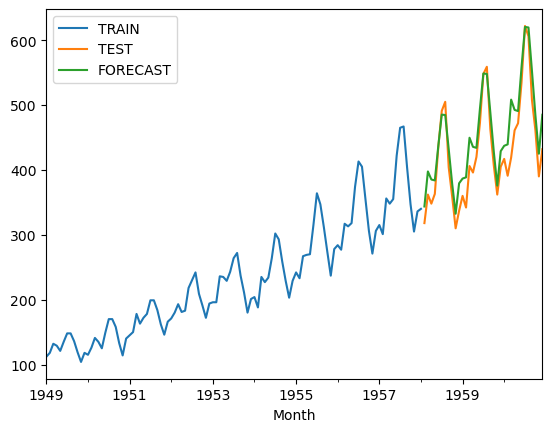

In [54]:
fitted_model = ExponentialSmoothing(np.log(train_data['Thousands of Passengers'])
                                  , trend = 'add'
                                  , seasonal = 'add'
                                  , seasonal_periods = 12).fit()

ax = train_data['Thousands of Passengers'].plot(legend = True, label = 'TRAIN')
test_forecast = pd.concat([test_data, np.exp(fitted_model.forecast(35))], axis = 1)
test_forecast.columns = ['TEST', 'FORECAST']
test_forecast.plot(ax = ax, legend = True)

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [64]:
np.average(np.abs(test_forecast['TEST'] - test_forecast['FORECAST'])/ test_forecast['TEST'], weights = test_forecast['TEST']) 

0.06309803791458876

In [68]:
np.abs(test_forecast['TEST'] - test_forecast['FORECAST']).mean()

27.19705714227103

In [71]:
np.sqrt(mean_squared_error(test_forecast['TEST'],test_forecast['FORECAST']))

32.1252763054166

In [73]:
df2 = pd.read_csv('samples.csv', index_col = 0, parse_dates=True)

In [78]:
diff(df2['b'])

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 119, dtype: float64

<Axes: >

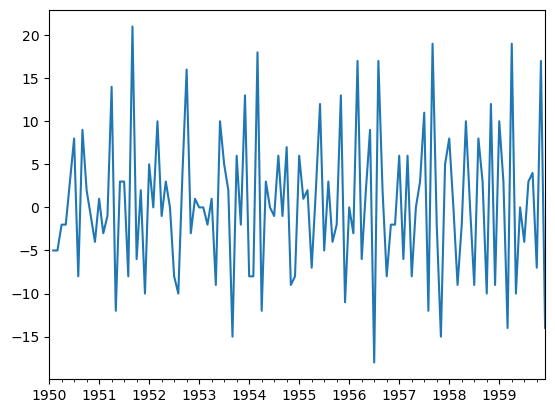

In [80]:
df2['b'].diff().plot()